# ADS 2023 spring Week 1 Exercises
Exercises for Algorithms and Data Structures at ITU. The exercises are from *Algorithms, 4th Edition* by Roberty Sedgewick and Kevin Wayne unless otherwise specified. Color-coding of difficulty level and alterations to exercises (if any) are made by the teachers of the ADS course at ITU.

**<span style="background: LimeGreen">1.1.14 - Green</span>**  Design an algorithm that takes an integer value $N$ as argument and returns the largest integer not larger than the base-2 logarithm of $N$. Do not use a math library.

*Solution*  
The algorithm uses the funciton $2^x=N$ and should return the largest integer $r$ where $r<x$

In [6]:
def algo(N: int):
    x = 0
    while 2**(x + 1) <= N:
        x += 1
    return x

algo(32)

5

**<span style="background: LimeGreen">1.5.1 - Green</span>**  Show the contents od the `id[]` array and the number of times the array is accessed for each input pair when you use quick-find for the sequence `9-0 3-4 5-8 7-2 2-1 5-7 0-3 4-2`.

*Solution*

In [7]:
# Modified from itu.ags4.uf to count times _id is accessed
class QuickFindUF:
    """
    This is an implementation of the union-find data structure - see module documentation for
    more info.

    This implementation uses quick find. Initializing a data structure with n sites takes linear time.
    Afterwards, the find, connected, and count operations take constant time but the union operation
    takes linear time.

    For additional documentation, see Section 1.5 of Algorithms, 4th Edition by Robert Sedgewick and Kevin Wayne.
    """

    def __init__(self, n: int) -> None:
        """
        Initializes an empty union-find data structure with n sites,
        0 through n-1. Each site is initially in its own component.

        :param n: the number of sites
        """
        self._count = n
        self._id = list(range(n))
        self._times_accessed = 0

    def _validate(self, p: int) -> None:
        # validate that p is a valid index
        n = len(self._id)
        if p < 0 or p >= n:
            raise ValueError('index {} is not between 0 and {}'.format(p, n - 1))

    def union(self, p: int, q: int) -> None:
        """
        Merges the component containing site p with the
        component containing site q.

        :param p: the integer representing one site
        :param q: the integer representing the other site
        """
        self._validate(p)
        self._validate(q)

        p_id = self._id[p] # needed for correctness
        q_id = self._id[q] # to reduce the number of array accesses
        self._times_accessed += 2

        # p and q are already in the same component
        if p_id == q_id:
            return

        for i in range(len(self._id)):
            if self._id[i] == p_id:
                self._id[i] = q_id
            self._times_accessed += 1
        self._count -= 1

    def find(self, p: int) -> int:
        """
        Returns the component identifier for the component containing site p.

        :param p: the integer representing one site
        :return: the component identifier for the component containing site p
        """
        self._validate(p)
        self._times_accessed += 1
        return self._id[p]

    def connected(self, p: int, q: int) -> bool:
        """
        Returns true if the two sites are in the same component.

        :param p: the integer representing one site
        :param q: the integer representing the other site
        :return: true if the two sites p and q are in the same component; false otherwise
        """
        self._validate(p)
        self._validate(q)
        self._times_accessed += 2
        return self._id[p] == self._id[q]

    def count(self):
        return self._count
sequence = [(9, 0), (3, 4), (5, 8), (7, 2), (2, 1), (5, 7), (0, 3), (4, 2),]

uf = QuickFindUF(10)
[uf.union(p, q) for p, q in sequence]
    
print(f"id array: {uf._id}")
print(f"The list was accessed {uf._times_accessed} times")

id array: [1, 1, 1, 1, 1, 1, 6, 1, 1, 1]
The list was accessed 96 times


**<span style="background: LimeGreen">1.5.2 - Green</span>**  Do Exercise 1.5.1, but use quick-union (page 224). In addition, draw the forest
of trees represented by the id[] array after each input pair is processed.

*Solution*

In [8]:
class QU:
    """QuickUnion from page 224 of the textbook"""
    def __init__(self, n: int) -> None:
        self._id = [i for i in range(n)]
        self._times_accessed = 0
    
    def find(self, p: int) -> int:
        self._times_accessed += 1
        while p != self._id[p]:
            self._times_accessed += 1
            p = self._id[p]
        return p
    
    def union(self, p: int, q: int) -> None:
        p_root = self.find(p)
        q_root = self.find(q)
        if (p_root == q_root):
            return
        
        self._id[p_root] = q_root

uf = QU(10)
for p, q in sequence:
    uf.union(p, q)


**<span style="background: LimeGreen">1.5.3 - Green</span>**  Do Exercise 1.5.1, but use weighted quick-union (page 228).

*Solution*

In [9]:
class WeightedQuickUnionUF:
    def __init__(self, N: int) -> None:
        self._count = N
        self._id = [i for i in range(N)]
        self._sz = [i for i in range(N)]
    
    def count(self) -> int:
        return self._count
    
    def connected(self, p: int, q: int) -> bool:
        return self.find(p) == self.find(q)
    
    def find(self, p: int) -> int:
        while (p != self._id[p]):
            p = self._id[p]
        return p
    
    def union(self, p: int, q: int) -> None:
        i = self.find(p)
        j = self.find(q)
        if (i == j):
            return
        
        # Make smaller root point to larger one.
        if (self._sz[i] < self._sz[i]):
            self._id[i] = j
            self._sz[j] += self._sz[i]
        else:
            self._id[j] = i
            self._sz[i] += self._sz[j]
        self._count -= 1

uf = WeightedQuickUnionUF(10)
for p, q in sequence:
    uf.union(p, q)

print(uf._id)

[9, 7, 7, 9, 3, 9, 6, 5, 5, 9]


**<span style="background: Yellow">1.5.8 - Yellow</span>**  Give a counterexample that shows why this intuitive implementation of
union() for quick-find is not correct:  
```py
# Python
def union (self, p: int, q: int) -> None :
    if self.connected (p, q):
        return

    # Rename p’s component to q’s name .
    for i in range(0, len(id)):
        if id[i] == id[p]:
            id[i] = id[q]
    self._count -= 1
```

#1: `id` is the identity function in python, and cannot be accessed as a list.  
#2: Instead of making a union between the sets of `p` and `q`, it instead points all elements that previously pointed to `p`'s parent to `q`'s parent, instead of changing the roots.

In [19]:
_id = [i for i in range(10)]
def union (p: int, q: int) -> None :
    # Rename p’s component to q’s name .
    for i in range(0, len(_id)):
        if _id[i] == _id[p]:
            _id[i] = _id[q]
print(_id)
union(1, 2)
union(2, 3)
union(4, 5)
union(5, 6)
print(_id)
union(1, 4)
print(_id)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 3, 3, 6, 6, 6, 7, 8, 9]
[0, 6, 3, 3, 6, 6, 6, 7, 8, 9]


**<span style="background: Red">1.5.9 - Yellow</span>**  Draw the tree corresponding to the id[] array depicted below. Can this be the
result of running weighted quick-union? Explain why this is impossible or give a sequence of
operations that results in this array.
```rust
i      0  1  2  3  4  5  6  7  8  9  
id[i]  1  1  3  1  5  6  1  3  4  5  
```

*Solution*  
It is impossible. The tree contains links of length 3, which would not happen when using weighted quick-union. A union between a 2-link chain with a 1-link chain will cause the 1-link chain to point to the root of the 2-link chain, thus not adding a longer link.  
(A union between 8 and 4 will always cause 8 to point to 5)  
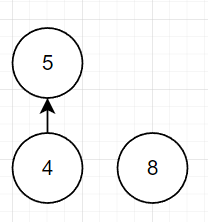